In [1]:
!pip install pandas matplotlib seaborn plotly

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print ("All libraries loading!")
print (f"Pandas Version: {pd.__version__}")

All libraries loading!
Pandas Version: 2.3.1


In [3]:
file_path = '/home/ufavela/clinical-data-projects/datasets/cms-hospital-data/Medicare_post_acute_care_utilization.csv'

try: 
    df= pd.read_csv(file_path)
    print ("Data load successfully!")
    print (f'Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns')
except FileNotFoundError:
    print( "File not found. Please check the file path")
except Exception as e:
    print(f'Error loading data: {e}')

Data load successfully!
Dataset shape: 8519 rows x 78 columns


In [4]:
print ("=== First 5 Rows===")
display(df.head())
print ("\n === Column Information ===")
print(df.info())
print("\n === Basic Statistics ===")
display(df.describe())
print("\n === Column Names ===")
print("Columns in Dataset:", list(df.columns))

=== First 5 Rows===


,YEAR,YEAR_TYPE,SMRY_CTGRY,SRVC_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,PRVDR_ZIP,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_OUTLIER_PYMT_AMT,BENE_DUAL_PCT,BENE_RRL_PCT,BENE_AVG_AGE,BENE_MALE_PCT,BENE_FEML_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_API_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_NATIND_PCT,BENE_RACE_UNK_PCT,BENE_RACE_OTHR_PCT,BENE_AVG_RISK_SCRE,BENE_CC_BH_ADHD_OTHCD_V1_PCT,BENE_CC_BH_ALCOHOL_DRUG_V1_PCT,BENE_CC_BH_ALZ_NONALZDEM_V2_PCT,BENE_CC_BH_ANXIETY_V1_PCT,BENE_CC_BH_BIPOLAR_V1_PCT,BENE_CC_BH_DEPRESS_V1_PCT,BENE_CC_BH_MOOD_V2_PCT,BENE_CC_BH_PD_V1_PCT,BENE_CC_BH_PTSD_V1_PCT,BENE_CC_BH_SCHIZO_OTHPSY_V1_PCT,BENE_CC_BH_TOBACCO_V1_PCT,BENE_CC_PH_AFIB_V2_PCT,BENE_CC_PH_ARTHRITIS_V2_PCT,BENE_CC_PH_ASTHMA_V2_PCT,BENE_CC_PH_CANCER6_V2_PCT,BENE_CC_PH_CKD_V2_PCT,BENE_CC_PH_COPD_V2_PCT,BENE_CC_PH_DIABETES_V2_PCT,BENE_CC_PH_HF_NONIHD_V2_PCT,BENE_CC_PH_HYPERLIPIDEMIA_V2_PCT,BENE_CC_PH_HYPERTENSION_V2_PCT,BENE_CC_PH_ISCHEMICHEART_V2_PCT,BENE_CC_PH_OSTEOPOROSIS_V2_PCT,BENE_CC_PH_PARKINSON_V2_PCT,BENE_CC_PH_STROKE_TIA_V2_PCT,PRMRY_DX_INFCTN_PCT,PRMRY_DX_NEOBLD_PCT,PRMRY_DX_ENDONUTRMET_PCT,PRMRY_DX_MNTBEHNEUDIS_PCT,PRMRY_DX_NERVSYSTM_PCT,PRMRY_DX_ENTSYS_PCT,PRMRY_DX_CIRCSYSTM_PCT,PRMRY_DX_RSPSYSTM_PCT,PRMRY_DX_DIGSYSTM_PCT,PRMRY_DX_SKNMUSSYSTM_PCT,PRMRY_DX_GUSYSTM_PCT,PRMRY_DX_PRGPERICONG_PCT,PRMRY_DX_SXILLDEF_PCT,PRMRY_DX_INJPOIS_PCT,PRMRY_DX_HLTHSRV_PCT,NRSNG_VISITS_CNT,MSW_VISITS_CNT,AIDE_VISITS_CNT,TOT_NRSNG_MNTS,TOT_PT_MNTS,TOT_OT_MNTS,TOT_SLP_MNTS,TOT_HH_LUPA_EPSDS_CNT
0,2023,CY,NATION,HH,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,2703071,8248545,58609540,20033506813,15717592199,15717592199,15883712576,352114221,24,7,78,40,60,79,9,3,6,0,2,1,2.11,1,11,26,39,7,40,44,2,2,5,14,34,69,14,19,42,30,44,39,83,91,45,22,6,18,1,3,9,2,8,0,23,6,2,15,3,0,0,11,15,32192577,396010,3428186,1395149580,1062704715,289006110,53445045,567015
1,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AK,STATE TOTAL,3128,7847,55276,20655298,17724324,17724324,15666163,394331,37,22,77,39,61,79,3,4,2,10,1,1,2.05,1,16,31,34,8,37,41,3,4,4,20,35,64,15,17,38,32,41,37,70,87,37,22,6,19,1,3,5,2,10,0,15,5,2,20,3,*,0,15,19,25300,657,2822,1208040,1277805,369555,83850,707
2,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AL,STATE TOTAL,47660,159558,1023170,535668906,234954332,234954332,302210742,2330440,18,13,78,39,61,84,14,0,1,0,1,0,1.98,1,10,27,40,6,39,43,2,2,4,17,35,69,13,18,44,34,46,40,83,94,47,20,5,19,1,4,9,2,7,0,26,8,2,12,4,0,0,10,14,519080,6029,36591,21945285,18741555,5731515,1518060,11376
3,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AR,STATE TOTAL,29245,90055,613231,421499452,139987887,139987887,168361413,1382627,20,26,78,40,60,90,8,0,1,0,1,0,2.08,1,11,24,40,7,42,45,2,2,3,18,38,66,12,19,41,35,42,43,78,93,50,21,5,20,1,4,8,1,8,0,26,8,2,13,4,0,0,11,13,326271,3150,37318,13494450,10994505,2504820,668760,6734
4,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AZ,STATE TOTAL,44207,114295,761009,260717648,210539881,210539881,221552610,2422068,12,2,79,41,59,85,2,1,7,2,1,1,2.10,1,13,26,37,7,40,43,2,2,3,12,36,67,15,21,45,30,40,35,82,90,44,25,6,20,2,3,6,2,9,0,19,6,2,14,4,0,0,16,17,362099,7420,33441,16728270,16065990,4373040,780195,9669



 === Column Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              8519 non-null   int64  
 1   YEAR_TYPE                         8519 non-null   object 
 2   SMRY_CTGRY                        8519 non-null   object 
 3   SRVC_CTGRY                        8519 non-null   object 
 4   PRVDR_ID                          8519 non-null   object 
 5   PRVDR_NAME                        8518 non-null   object 
 6   PRVDR_CITY                        8519 non-null   object 
 7   STATE                             8519 non-null   object 
 8   PRVDR_ZIP                         8519 non-null   object 
 9   BENE_DSTNCT_CNT                   8519 non-null   int64  
 10  TOT_EPSD_STAY_CNT                 8519 non-null   int64  
 11  TOT_SRVC_DAYS                     8519 n

,YEAR,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_OUTLIER_PYMT_AMT,BENE_AVG_AGE,BENE_AVG_RISK_SCRE
count,8519.0,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8519.000000,8519.000000
mean,2023.0,9.834742e+02,2.902561e+03,2.062221e+04,7.051419e+06,5.531270e+06,5.531270e+06,5.589669e+06,1.238745e+05,77.813006,2.420202
std,0.0,2.998451e+04,9.188266e+04,6.535660e+05,2.218619e+08,1.759017e+08,1.759017e+08,1.768029e+08,4.056356e+06,3.573419,4.394268
min,2023.0,1.100000e+01,1.200000e+01,6.200000e+01,9.900000e+03,2.108800e+04,2.108800e+04,2.094400e+04,0.000000e+00,54.000000,1.020000
25%,2023.0,5.800000e+01,2.030000e+02,1.434500e+03,2.857000e+05,3.671325e+05,3.671325e+05,3.728310e+05,2.493500e+03,76.000000,1.910000
50%,2023.0,1.480000e+02,5.040000e+02,3.561000e+03,7.656030e+05,9.251680e+05,9.251680e+05,9.328620e+05,1.084200e+04,78.000000,2.170000
75%,2023.0,3.850000e+02,1.120500e+03,8.045500e+03,2.268382e+06,2.090890e+06,2.090890e+06,2.141796e+06,3.951300e+04,80.000000,2.430000
max,2023.0,2.703071e+06,8.248545e+06,5.860954e+07,2.003351e+10,1.571759e+10,1.571759e+10,1.588371e+10,3.521142e+08,90.000000,100.000000



 === Column Names ===
Columns in Dataset: ['YEAR', 'YEAR_TYPE', 'SMRY_CTGRY', 'SRVC_CTGRY', 'PRVDR_ID', 'PRVDR_NAME', 'PRVDR_CITY', 'STATE', 'PRVDR_ZIP', 'BENE_DSTNCT_CNT', 'TOT_EPSD_STAY_CNT', 'TOT_SRVC_DAYS', 'TOT_CHRG_AMT', 'TOT_ALOWD_AMT', 'TOT_MDCR_PYMT_AMT', 'TOT_MDCR_STDZD_PYMT_AMT', 'TOT_OUTLIER_PYMT_AMT', 'BENE_DUAL_PCT', 'BENE_RRL_PCT', 'BENE_AVG_AGE', 'BENE_MALE_PCT', 'BENE_FEML_PCT', 'BENE_RACE_WHT_PCT', 'BENE_RACE_BLACK_PCT', 'BENE_RACE_API_PCT', 'BENE_RACE_HSPNC_PCT', 'BENE_RACE_NATIND_PCT', 'BENE_RACE_UNK_PCT', 'BENE_RACE_OTHR_PCT', 'BENE_AVG_RISK_SCRE', 'BENE_CC_BH_ADHD_OTHCD_V1_PCT', 'BENE_CC_BH_ALCOHOL_DRUG_V1_PCT', 'BENE_CC_BH_ALZ_NONALZDEM_V2_PCT', 'BENE_CC_BH_ANXIETY_V1_PCT', 'BENE_CC_BH_BIPOLAR_V1_PCT', 'BENE_CC_BH_DEPRESS_V1_PCT', 'BENE_CC_BH_MOOD_V2_PCT', 'BENE_CC_BH_PD_V1_PCT', 'BENE_CC_BH_PTSD_V1_PCT', 'BENE_CC_BH_SCHIZO_OTHPSY_V1_PCT', 'BENE_CC_BH_TOBACCO_V1_PCT', 'BENE_CC_PH_AFIB_V2_PCT', 'BENE_CC_PH_ARTHRITIS_V2_PCT', 'BENE_CC_PH_ASTHMA_V2_PCT', 'BENE_CC_P

In [5]:
print(f"Memory usage after optimization: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Memory usage after optimization: 33.0 MB


In [6]:
print("=== Missing Values ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data /len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count' : missing_data, 
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])

print(f"\n=== Duplicates ===")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\n=== Categorical Variables Preview ===")
for col in df.columns:
    if df[col].dtype == 'object': 
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f" Values: {list(df[col].unique())}")
        print()

=== Missing Values ===
            Missing Count  Percentage
PRVDR_NAME              1    0.011738

=== Duplicates ===
Duplicate rows: 0

=== Categorical Variables Preview ===
YEAR_TYPE: 1 unique values
 Values: ['CY']

SMRY_CTGRY: 3 unique values
 Values: ['NATION', 'STATE', 'PROVIDER']

SRVC_CTGRY: 1 unique values
 Values: ['HH']

PRVDR_ID: 8468 unique values

PRVDR_NAME: 7046 unique values

PRVDR_CITY: 2510 unique values

STATE: 53 unique values

PRVDR_ZIP: 4166 unique values

BENE_DUAL_PCT: 100 unique values

BENE_RRL_PCT: 100 unique values

BENE_MALE_PCT: 63 unique values

BENE_FEML_PCT: 64 unique values

BENE_RACE_WHT_PCT: 101 unique values

BENE_RACE_BLACK_PCT: 101 unique values

BENE_RACE_API_PCT: 95 unique values

BENE_RACE_HSPNC_PCT: 102 unique values

BENE_RACE_NATIND_PCT: 41 unique values

BENE_RACE_UNK_PCT: 53 unique values

BENE_RACE_OTHR_PCT: 15 unique values

BENE_CC_BH_ADHD_OTHCD_V1_PCT: 26 unique values

BENE_CC_BH_ALCOHOL_DRUG_V1_PCT: 57 unique values

BENE_CC_BH_ALZ

In [7]:
db_path = '/home/ufavela/clinical-data-projects/medicare_analysis.db'
conn = sqlite3.connect(db_path)

table_name = 'medicare_post_acute_care'
df.to_sql(table_name, conn, if_exists='replace', index=False)

print(f" Data loaded into Sqlite DB: {db_path}")
print(f" Table name: {table_name}")

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f" Tables in DB: {tables}")

 Data loaded into Sqlite DB: /home/ufavela/clinical-data-projects/medicare_analysis.db
 Table name: medicare_post_acute_care
 Tables in DB: [('medicare_post_acute_care',)]


In [8]:
def run_sql_query(query, description=""):
    """Execute SQL query and return results as pandas Dataframe"""
    try: 
        result = pd.read_sql_query(query, conn)
        if description:
            print(f"=== {description} ===")
        return result
    except Exception as e: 
        print(f" Error executing query: {e}")
        return None

#QUERY 1: Basic SELECT statement to view first 10 rows
query1 = f"""
SELECT *
FROM {table_name}
LIMIT 55;
"""
result1 = run_sql_query(query1, "First 55 Records")
display(result1)

=== First 55 Records ===


,YEAR,YEAR_TYPE,SMRY_CTGRY,SRVC_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,PRVDR_ZIP,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_OUTLIER_PYMT_AMT,BENE_DUAL_PCT,BENE_RRL_PCT,BENE_AVG_AGE,BENE_MALE_PCT,BENE_FEML_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_API_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_NATIND_PCT,BENE_RACE_UNK_PCT,BENE_RACE_OTHR_PCT,BENE_AVG_RISK_SCRE,BENE_CC_BH_ADHD_OTHCD_V1_PCT,BENE_CC_BH_ALCOHOL_DRUG_V1_PCT,BENE_CC_BH_ALZ_NONALZDEM_V2_PCT,BENE_CC_BH_ANXIETY_V1_PCT,BENE_CC_BH_BIPOLAR_V1_PCT,BENE_CC_BH_DEPRESS_V1_PCT,BENE_CC_BH_MOOD_V2_PCT,BENE_CC_BH_PD_V1_PCT,BENE_CC_BH_PTSD_V1_PCT,BENE_CC_BH_SCHIZO_OTHPSY_V1_PCT,BENE_CC_BH_TOBACCO_V1_PCT,BENE_CC_PH_AFIB_V2_PCT,BENE_CC_PH_ARTHRITIS_V2_PCT,BENE_CC_PH_ASTHMA_V2_PCT,BENE_CC_PH_CANCER6_V2_PCT,BENE_CC_PH_CKD_V2_PCT,BENE_CC_PH_COPD_V2_PCT,BENE_CC_PH_DIABETES_V2_PCT,BENE_CC_PH_HF_NONIHD_V2_PCT,BENE_CC_PH_HYPERLIPIDEMIA_V2_PCT,BENE_CC_PH_HYPERTENSION_V2_PCT,BENE_CC_PH_ISCHEMICHEART_V2_PCT,BENE_CC_PH_OSTEOPOROSIS_V2_PCT,BENE_CC_PH_PARKINSON_V2_PCT,BENE_CC_PH_STROKE_TIA_V2_PCT,PRMRY_DX_INFCTN_PCT,PRMRY_DX_NEOBLD_PCT,PRMRY_DX_ENDONUTRMET_PCT,PRMRY_DX_MNTBEHNEUDIS_PCT,PRMRY_DX_NERVSYSTM_PCT,PRMRY_DX_ENTSYS_PCT,PRMRY_DX_CIRCSYSTM_PCT,PRMRY_DX_RSPSYSTM_PCT,PRMRY_DX_DIGSYSTM_PCT,PRMRY_DX_SKNMUSSYSTM_PCT,PRMRY_DX_GUSYSTM_PCT,PRMRY_DX_PRGPERICONG_PCT,PRMRY_DX_SXILLDEF_PCT,PRMRY_DX_INJPOIS_PCT,PRMRY_DX_HLTHSRV_PCT,NRSNG_VISITS_CNT,MSW_VISITS_CNT,AIDE_VISITS_CNT,TOT_NRSNG_MNTS,TOT_PT_MNTS,TOT_OT_MNTS,TOT_SLP_MNTS,TOT_HH_LUPA_EPSDS_CNT
0,2023,CY,NATION,HH,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,2703071,8248545,58609540,20033506813,15717592199,15717592199,15883712576,352114221,24,7,78,40,60,79,9,3,6,0,2,1,2.11,1,11,26,39,7,40,44,2,2,5,14,34,69,14,19,42,30,44,39,83,91,45,22,6,18,1,3,9,2,8,0,23,6,2,15,3,0,0,11,15,32192577,396010,3428186,1395149580,1062704715,289006110,53445045,567015
1,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AK,STATE TOTAL,3128,7847,55276,20655298,17724324,17724324,15666163,394331,37,22,77,39,61,79,3,4,2,10,1,1,2.05,1,16,31,34,8,37,41,3,4,4,20,35,64,15,17,38,32,41,37,70,87,37,22,6,19,1,3,5,2,10,0,15,5,2,20,3,*,0,15,19,25300,657,2822,1208040,1277805,369555,83850,707
2,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AL,STATE TOTAL,47660,159558,1023170,535668906,234954332,234954332,302210742,2330440,18,13,78,39,61,84,14,0,1,0,1,0,1.98,1,10,27,40,6,39,43,2,2,4,17,35,69,13,18,44,34,46,40,83,94,47,20,5,19,1,4,9,2,7,0,26,8,2,12,4,0,0,10,14,519080,6029,36591,21945285,18741555,5731515,1518060,11376
3,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AR,STATE TOTAL,29245,90055,613231,421499452,139987887,139987887,168361413,1382627,20,26,78,40,60,90,8,0,1,0,1,0,2.08,1,11,24,40,7,42,45,2,2,3,18,38,66,12,19,41,35,42,43,78,93,50,21,5,20,1,4,8,1,8,0,26,8,2,13,4,0,0,11,13,326271,3150,37318,13494450,10994505,2504820,668760,6734
4,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,AZ,STATE TOTAL,44207,114295,761009,260717648,210539881,210539881,221552610,2422068,12,2,79,41,59,85,2,1,7,2,1,1,2.10,1,13,26,37,7,40,43,2,2,3,12,36,67,15,21,45,30,40,35,82,90,44,25,6,20,2,3,6,2,9,0,19,6,2,14,4,0,0,16,17,362099,7420,33441,16728270,16065990,4373040,780195,9669
5,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,CA,STATE TOTAL,346515,1251352,9025597,2194747503,3006762727,3006762727,2336735985,106432778,49,1,78,41,59,60,6,12,16,0,4,2,2.12,1,12,27,33,6,39,43,1,2,7,12,29,68,16,17,39,27,48,38,83,91,44,26,6,17,1,3,15,1,8,0,24,5,1,21,3,0,0,7,10,6216609,69634,542552,296493285,126528060,23541285,3598050,60207
6,2023,CY,STATE,HH,STATE TOTAL,STATE TOTAL,STATE TOTAL,CO,STATE TOTAL,26319,66278,467305,136623427,125714029,125714029,128842302,2103567,18,6,79,39,61,85,3,2,8,0,2,1,2.01,1,13,27,35,7,42,45,2,3,3,12,31,68,14,19,43,29,33,34,73,84,36,26,6,16,2,3,6,2,11,0,16,6,2,15,3,0,0,15,18,169202,2475,15842,6927420,11571135,3655320,643155,5425
7,2023,CY,STATE,HH,STATE TOTAL,STAT

In [9]:
#Query to delete "total" rows to prevent skewed analysis.
query2 = f"""
DELETE FROM {table_name}
WHERE [PRVDR_ID] LIKE '%TOTAL%';
"""
run_sql_query(query2, "Totals Removed")
conn.commit()

 Error executing query: 'NoneType' object is not iterable


In [10]:
# Query to display first 5 rows to verify "total" rows were deleted.
verify_query = f"""
SELECT *
FROM {table_name}
LIMIT 5;
"""
verify_data = run_sql_query(verify_query, "Totals Removed")
display(verify_data)

=== Totals Removed ===


,YEAR,YEAR_TYPE,SMRY_CTGRY,SRVC_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,PRVDR_ZIP,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_OUTLIER_PYMT_AMT,BENE_DUAL_PCT,BENE_RRL_PCT,BENE_AVG_AGE,BENE_MALE_PCT,BENE_FEML_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_API_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_NATIND_PCT,BENE_RACE_UNK_PCT,BENE_RACE_OTHR_PCT,BENE_AVG_RISK_SCRE,BENE_CC_BH_ADHD_OTHCD_V1_PCT,BENE_CC_BH_ALCOHOL_DRUG_V1_PCT,BENE_CC_BH_ALZ_NONALZDEM_V2_PCT,BENE_CC_BH_ANXIETY_V1_PCT,BENE_CC_BH_BIPOLAR_V1_PCT,BENE_CC_BH_DEPRESS_V1_PCT,BENE_CC_BH_MOOD_V2_PCT,BENE_CC_BH_PD_V1_PCT,BENE_CC_BH_PTSD_V1_PCT,BENE_CC_BH_SCHIZO_OTHPSY_V1_PCT,BENE_CC_BH_TOBACCO_V1_PCT,BENE_CC_PH_AFIB_V2_PCT,BENE_CC_PH_ARTHRITIS_V2_PCT,BENE_CC_PH_ASTHMA_V2_PCT,BENE_CC_PH_CANCER6_V2_PCT,BENE_CC_PH_CKD_V2_PCT,BENE_CC_PH_COPD_V2_PCT,BENE_CC_PH_DIABETES_V2_PCT,BENE_CC_PH_HF_NONIHD_V2_PCT,BENE_CC_PH_HYPERLIPIDEMIA_V2_PCT,BENE_CC_PH_HYPERTENSION_V2_PCT,BENE_CC_PH_ISCHEMICHEART_V2_PCT,BENE_CC_PH_OSTEOPOROSIS_V2_PCT,BENE_CC_PH_PARKINSON_V2_PCT,BENE_CC_PH_STROKE_TIA_V2_PCT,PRMRY_DX_INFCTN_PCT,PRMRY_DX_NEOBLD_PCT,PRMRY_DX_ENDONUTRMET_PCT,PRMRY_DX_MNTBEHNEUDIS_PCT,PRMRY_DX_NERVSYSTM_PCT,PRMRY_DX_ENTSYS_PCT,PRMRY_DX_CIRCSYSTM_PCT,PRMRY_DX_RSPSYSTM_PCT,PRMRY_DX_DIGSYSTM_PCT,PRMRY_DX_SKNMUSSYSTM_PCT,PRMRY_DX_GUSYSTM_PCT,PRMRY_DX_PRGPERICONG_PCT,PRMRY_DX_SXILLDEF_PCT,PRMRY_DX_INJPOIS_PCT,PRMRY_DX_HLTHSRV_PCT,NRSNG_VISITS_CNT,MSW_VISITS_CNT,AIDE_VISITS_CNT,TOT_NRSNG_MNTS,TOT_PT_MNTS,TOT_OT_MNTS,TOT_SLP_MNTS,TOT_HH_LUPA_EPSDS_CNT
0,2023,CY,PROVIDER,HH,027001,Providence Home Health Alaska,Anchorage,AK,99508,557,1401,11235,5190636,3471152,3471152,3061440,155196,41,4,77,42,58,73,4,7,4,10,*,*,2.38,2,16,34,37,10,38,43,3,7,3,19,38,64,14,20,42,28,47,46,74,88,40,25,5,25,*,3,6,2,8,*,18,5,2,18,1,*,0,15,21,5743,279,590,283455,205050,100635,16905,95
1,2023,CY,PROVIDER,HH,027006,Fairbanks Memorial Hospital Hha,Fairbanks,AK,99701,149,383,2356,515500,681698,681698,705059,3986,28,*,78,48,52,86,*,*,*,9,*,0,1.85,0,9,32,24,*,28,31,*,*,*,21,38,58,11,17,33,35,40,38,68,83,33,17,*,19,*,*,8,*,5,0,15,*,*,14,8,0,0,19,24,1208,48,315,60240,56310,0,0,44
2,2023,CY,PROVIDER,HH,027008,Ancora Home Health & Hospice,Wasilla,AK,99654,1004,2316,16166,6897372,5189549,5189549,4541918,33562,37,3,77,38,62,84,1,3,2,8,*,*,2.09,1,19,36,37,9,39,44,2,3,4,20,35,65,15,14,40,34,41,37,73,89,36,21,8,22,1,1,5,2,12,*,15,5,2,19,2,*,1,15,19,6572,31,601,258480,368910,90240,46875,272
3,2023,CY,PROVIDER,HH,027009,Petersburg Medical Center Home,Petersburg,AK,99833,56,224,1527,503023,446519,446519,382389,9251,29,*,81,38,63,80,0,0,0,*,*,*,1.69,*,*,30,21,*,29,29,0,*,*,*,32,70,*,*,36,21,38,38,66,80,30,21,*,*,*,*,5,*,13,*,12,*,*,14,*,0,0,17,23,971,0,288,49245,15825,3165,3360,17
4,2023,CY,PROVIDER,HH,027010,South Peninsula Hospital Hha,Homer,AK,99603,130,353,2394,1137138,839126,839126,723830,23976,32,*,78,45,55,94,0,*,0,*,*,*,1.88,*,9,30,35,*,38,42,*,*,*,9,39,62,10,14,32,24,34,27,67,87,36,28,*,15,*,6,6,*,*,0,14,6,*,22,*,0,0,20,18,1550,0,86,69255,37425,19815,2385,30


In [11]:
#Query to output total record count.
print("Original Dataset: 8519 rows")

query3 = f"""
SELECT COUNT(*) as total_records
FROM {table_name};
"""
total_count = run_sql_query(query3, "Total Record Count")
display(total_count)

Original Dataset: 8519 rows
=== Total Record Count ===


,total_records
0,8466


In [12]:
#List all columns available in dataset.
print("Available columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

#Query to demonstrate basic filtering via "where" statement.
query4 = f"""
SELECT *
FROM {table_name}
WHERE [STATE] = 'IL';
"""
provider_il = run_sql_query(query4, "IL Data")
display(provider_il)

Available columns:
1. YEAR
2. YEAR_TYPE
3. SMRY_CTGRY
4. SRVC_CTGRY
5. PRVDR_ID
6. PRVDR_NAME
7. PRVDR_CITY
8. STATE
9. PRVDR_ZIP
10. BENE_DSTNCT_CNT
11. TOT_EPSD_STAY_CNT
12. TOT_SRVC_DAYS
13. TOT_CHRG_AMT
14. TOT_ALOWD_AMT
15. TOT_MDCR_PYMT_AMT
16. TOT_MDCR_STDZD_PYMT_AMT
17. TOT_OUTLIER_PYMT_AMT
18. BENE_DUAL_PCT
19. BENE_RRL_PCT
20. BENE_AVG_AGE
21. BENE_MALE_PCT
22. BENE_FEML_PCT
23. BENE_RACE_WHT_PCT
24. BENE_RACE_BLACK_PCT
25. BENE_RACE_API_PCT
26. BENE_RACE_HSPNC_PCT
27. BENE_RACE_NATIND_PCT
28. BENE_RACE_UNK_PCT
29. BENE_RACE_OTHR_PCT
30. BENE_AVG_RISK_SCRE
31. BENE_CC_BH_ADHD_OTHCD_V1_PCT
32. BENE_CC_BH_ALCOHOL_DRUG_V1_PCT
33. BENE_CC_BH_ALZ_NONALZDEM_V2_PCT
34. BENE_CC_BH_ANXIETY_V1_PCT
35. BENE_CC_BH_BIPOLAR_V1_PCT
36. BENE_CC_BH_DEPRESS_V1_PCT
37. BENE_CC_BH_MOOD_V2_PCT
38. BENE_CC_BH_PD_V1_PCT
39. BENE_CC_BH_PTSD_V1_PCT
40. BENE_CC_BH_SCHIZO_OTHPSY_V1_PCT
41. BENE_CC_BH_TOBACCO_V1_PCT
42. BENE_CC_PH_AFIB_V2_PCT
43. BENE_CC_PH_ARTHRITIS_V2_PCT
44. BENE_CC_PH_ASTHMA_V2_PCT


,YEAR,YEAR_TYPE,SMRY_CTGRY,SRVC_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,PRVDR_ZIP,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_OUTLIER_PYMT_AMT,BENE_DUAL_PCT,BENE_RRL_PCT,BENE_AVG_AGE,BENE_MALE_PCT,BENE_FEML_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_API_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_NATIND_PCT,BENE_RACE_UNK_PCT,BENE_RACE_OTHR_PCT,BENE_AVG_RISK_SCRE,BENE_CC_BH_ADHD_OTHCD_V1_PCT,BENE_CC_BH_ALCOHOL_DRUG_V1_PCT,BENE_CC_BH_ALZ_NONALZDEM_V2_PCT,BENE_CC_BH_ANXIETY_V1_PCT,BENE_CC_BH_BIPOLAR_V1_PCT,BENE_CC_BH_DEPRESS_V1_PCT,BENE_CC_BH_MOOD_V2_PCT,BENE_CC_BH_PD_V1_PCT,BENE_CC_BH_PTSD_V1_PCT,BENE_CC_BH_SCHIZO_OTHPSY_V1_PCT,BENE_CC_BH_TOBACCO_V1_PCT,BENE_CC_PH_AFIB_V2_PCT,BENE_CC_PH_ARTHRITIS_V2_PCT,BENE_CC_PH_ASTHMA_V2_PCT,BENE_CC_PH_CANCER6_V2_PCT,BENE_CC_PH_CKD_V2_PCT,BENE_CC_PH_COPD_V2_PCT,BENE_CC_PH_DIABETES_V2_PCT,BENE_CC_PH_HF_NONIHD_V2_PCT,BENE_CC_PH_HYPERLIPIDEMIA_V2_PCT,BENE_CC_PH_HYPERTENSION_V2_PCT,BENE_CC_PH_ISCHEMICHEART_V2_PCT,BENE_CC_PH_OSTEOPOROSIS_V2_PCT,BENE_CC_PH_PARKINSON_V2_PCT,BENE_CC_PH_STROKE_TIA_V2_PCT,PRMRY_DX_INFCTN_PCT,PRMRY_DX_NEOBLD_PCT,PRMRY_DX_ENDONUTRMET_PCT,PRMRY_DX_MNTBEHNEUDIS_PCT,PRMRY_DX_NERVSYSTM_PCT,PRMRY_DX_ENTSYS_PCT,PRMRY_DX_CIRCSYSTM_PCT,PRMRY_DX_RSPSYSTM_PCT,PRMRY_DX_DIGSYSTM_PCT,PRMRY_DX_SKNMUSSYSTM_PCT,PRMRY_DX_GUSYSTM_PCT,PRMRY_DX_PRGPERICONG_PCT,PRMRY_DX_SXILLDEF_PCT,PRMRY_DX_INJPOIS_PCT,PRMRY_DX_HLTHSRV_PCT,NRSNG_VISITS_CNT,MSW_VISITS_CNT,AIDE_VISITS_CNT,TOT_NRSNG_MNTS,TOT_PT_MNTS,TOT_OT_MNTS,TOT_SLP_MNTS,TOT_HH_LUPA_EPSDS_CNT
0,2023,CY,PROVIDER,HH,147001,Residential Home Health,Northbrook,IL,60062,2166,4773,25802,8468095,8756698,8756698,8642308,20678,11,*,81,38,62,83,4,6,4,0,2,2,2.08,1,6,23,31,6,35,39,1,1,2,6,34,71,12,25,42,23,37,37,85,87,41,30,7,19,1,5,5,1,9,*,22,6,4,13,3,*,*,12,18,12709,140,597,579120,611145,89595,20205,475
1,2023,CY,PROVIDER,HH,147003,Memorial Home Services,Springfield,IL,62781,519,899,7128,3175162,1654906,1654906,1862917,29394,25,11,75,43,57,92,6,*,*,*,*,0,1.91,*,8,13,37,4,33,38,*,*,*,19,31,74,12,22,31,32,41,37,82,89,49,18,3,13,1,2,7,0,2,0,11,7,2,11,4,0,0,12,42,3891,12,590,190920,132030,25965,3345,66
2,2023,CY,PROVIDER,HH,147006,Lawrence County Health Dept,Lawrenceville,IL,62439,183,461,4592,933123,778351,778351,886774,73952,32,*,79,32,68,99,0,0,0,0,*,*,1.90,*,7,20,39,*,34,37,*,*,*,14,36,76,10,15,38,42,45,42,73,92,42,21,8,18,*,3,11,*,5,0,26,13,3,8,*,0,0,11,16,2585,0,841,119745,96630,25995,12345,21
3,2023,CY,PROVIDER,HH,147009,Unity Point At Home,Moline,IL,61265,1049,2063,15409,3753273,3666220,3666220,4341710,106262,17,7,77,41,59,90,3,*,3,*,2,*,2.10,1,9,17,40,4,39,44,2,*,2,17,38,77,17,20,53,38,44,44,85,92,52,21,4,18,3,4,6,*,5,*,17,10,3,16,4,0,0,11,20,6802,194,2020,365865,314445,127440,8100,223
4,2023,CY,PROVIDER,HH,147018,Southwestern Il Visiting Nurse Assoc,Swansea,IL,62226,143,383,3222,840049,800917,800917,834891,65588,31,0,77,36,64,70,24,*,*,*,*,0,2.70,*,8,18,36,*,37,41,0,*,*,24,36,80,14,26,58,40,52,52,88,*,54,15,*,16,*,*,3,0,*,0,13,9,*,6,3,0,0,11,49,2152,32,20,112050,61905,31785,60,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2023,CY,PROVIDER,HH,148395,Tsn Home Health Llc,Calumet City,IL,60409,42,161,777,157866,224798,224798,222947,0,*,0,71,60,40,*,98,0,0,0,*,0,2.49,0,26,*,38,*,38,50,*,*,*,60,*,*,31,*,38,60,67,52,*,100,40,33,0,*,0,0,13,0,0,0,57,10,*,19,0,0,0,0,0,776,0,0,34140,0,0,0,0
468,2023,CY,PROVIDER,HH,148397,Special Home Health Care Llc,Palos Heights,IL,60463,59,102,674,118912,180941,180941,175117,2706,*,0,80,39,61,95,*,*,0,0,0,*,2.46,0,*,22,41,*,27,29,0,0,*,*,41,69,22,19,46,46,47,53,*,*,54,24,*,19,0,0,*,0,*,0,32,16,*,16,*,0,0,27,*,382,0,30,23325,18360,2580,0,*
469,2023,CY,PROVIDER,HH,148398,Up

In [13]:
#Query to demonstrate basic analysis, grouping and ordering. 
query5= f"""
SELECT
    [STATE],
    COUNT(*) as record_count,
    AVG([TOT_SRVC_DAYS]) as average_value,
    MIN([TOT_SRVC_DAYS]) as min_value,
    MAX([TOT_SRVC_DAYS]) as max_value
FROM {table_name}
GROUP BY [STATE]
ORDER BY average_value ASC
"""
group_test = run_sql_query(query5, "Average and Min/Max Service Days by State")
display(group_test)

=== Average and Min/Max Service Days by State ===


,STATE,record_count,average_value,min_value,max_value
0,PR,34,2327.147059,320,17897
1,IA,103,3218.378641,204,29546
2,WY,26,3410.653846,222,16037
3,SD,22,3567.045455,221,11263
4,MT,23,3755.304348,134,16474
5,ND,16,4004.437500,135,13279
6,MI,308,4128.360390,91,106614
7,AK,13,4252.000000,662,16166
8,CO,108,4298.046296,154,44631
9,CA,1953,4610.924731,66,85284


In [14]:
#Query to select specific columns and filter using basic comparison. 
query6 = f"""
SELECT [PRVDR_NAME], [STATE], [TOT_EPSD_STAY_CNT], [TOT_SRVC_DAYS], [TOT_CHRG_AMT], [TOT_ALOWD_AMT], [TOT_MDCR_PYMT_AMT], [TOT_MDCR_STDZD_PYMT_AMT]
FROM {table_name}
WHERE [TOT_MDCR_STDZD_PYMT_AMT] < [TOT_CHRG_AMT]
ORDER BY [STATE] ASC;
"""
net_loss = run_sql_query(query6, "Total Standardized Payment Less Than Total Charge Amount")
display(net_loss)

=== Total Standardized Payment Less Than Total Charge Amount ===


,PRVDR_NAME,STATE,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT
0,Providence Home Health Alaska,AK,1401,11235,5190636,3471152,3471152,3061440
1,Ancora Home Health & Hospice,AK,2316,16166,6897372,5189549,5189549,4541918
2,Petersburg Medical Center Home,AK,224,1527,503023,446519,446519,382389
3,South Peninsula Hospital Hha,AK,353,2394,1137138,839126,839126,723830
4,Peacehealth Ketchikan Medical Center Home Health,AK,411,2564,1173328,898450,898450,772080
...,...,...,...,...,...,...,...,...
2772,Rock Springs Young At Heart,WY,125,1112,188751,155727,155727,162821
2773,Enhabit Home Health,WY,1903,16037,4540118,3771326,3771326,4023997
2774,Casper Home Health Llc,WY,548,4186,1111879,1032529,1032529,1052276
2775,Premier Home Health Inc,WY,291,2400,619065,513356,513356,537486


In [15]:
#Query to demonstrate filtering by pattern. 
query7 = f"""
SELECT [PRVDR_NAME], [PRVDR_CITY], [STATE], [TOT_CHRG_AMT], [TOT_MDCR_STDZD_PYMT_AMT], [TOT_EPSD_STAY_CNT], [TOT_NRSNG_MNTS], [TOT_PT_MNTS], [TOT_OT_MNTS], [TOT_SLP_MNTS]
FROM {table_name}
WHERE [PRVDR_NAME] LIKE '%Astra%'
ORDER BY [PRVDR_NAME]
LIMIT 50;
"""
hh_finder = run_sql_query(query7, "Specific Agencies")
display(hh_finder)

=== Specific Agencies ===


,PRVDR_NAME,PRVDR_CITY,STATE,TOT_CHRG_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_EPSD_STAY_CNT,TOT_NRSNG_MNTS,TOT_PT_MNTS,TOT_OT_MNTS,TOT_SLP_MNTS
0,Astra Health,Harwood Heights,IL,5587992,5966700,2759,514755,450030,237450,20040
1,Astra Health West,Elgin,IL,2474178,3016674,1396,158535,333990,76785,8550
2,Astra Home Health Care Inc,Sherman Oaks,CA,230175,404004,241,53580,15915,1305,0


In [16]:
#Query to demonstrate finding minimum and maximum values of a column. 
summary_query = f"""
SELECT
    COUNT(DISTINCT [PRVDR_NAME]) as unique_providers,
    MIN([TOT_EPSD_STAY_CNT]) as minimum_episodes,
    MAX([TOT_EPSD_STAY_CNT]) as maximum_episodes
FROM {table_name};
"""
summary_sql = run_sql_query(summary_query, "Unique Providers and Min/Max Episodes")
display(summary_sql)

=== Unique Providers and Min/Max Episodes ===


,unique_providers,minimum_episodes,maximum_episodes
0,7044,12,30835


In [17]:
#Query to demonstrate finding provider with maximum episode count and respoective charges and payments. 
max_episode = f"""
SELECT [PRVDR_NAME], [PRVDR_CITY], [STATE], [TOT_CHRG_AMT], [TOT_MDCR_STDZD_PYMT_AMT], [TOT_EPSD_STAY_CNT] 
FROM {table_name}
WHERE [TOT_EPSD_STAY_CNT] = '30835'
"""
max_ep = run_sql_query(max_episode, "Provider with the Largest Episode Count")
display(max_ep)

=== Provider with the Largest Episode Count ===


,PRVDR_NAME,PRVDR_CITY,STATE,TOT_CHRG_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_EPSD_STAY_CNT
0,Vns Of Ny Home Care Chha,New York,NY,88650288,66492414,30835


In [18]:
#Code to ensure visualizations display states correctly. 
import re
df = df[df["STATE"].apply(lambda x: bool(re.match(r'^[A-Z]{2}$', str(x))))]

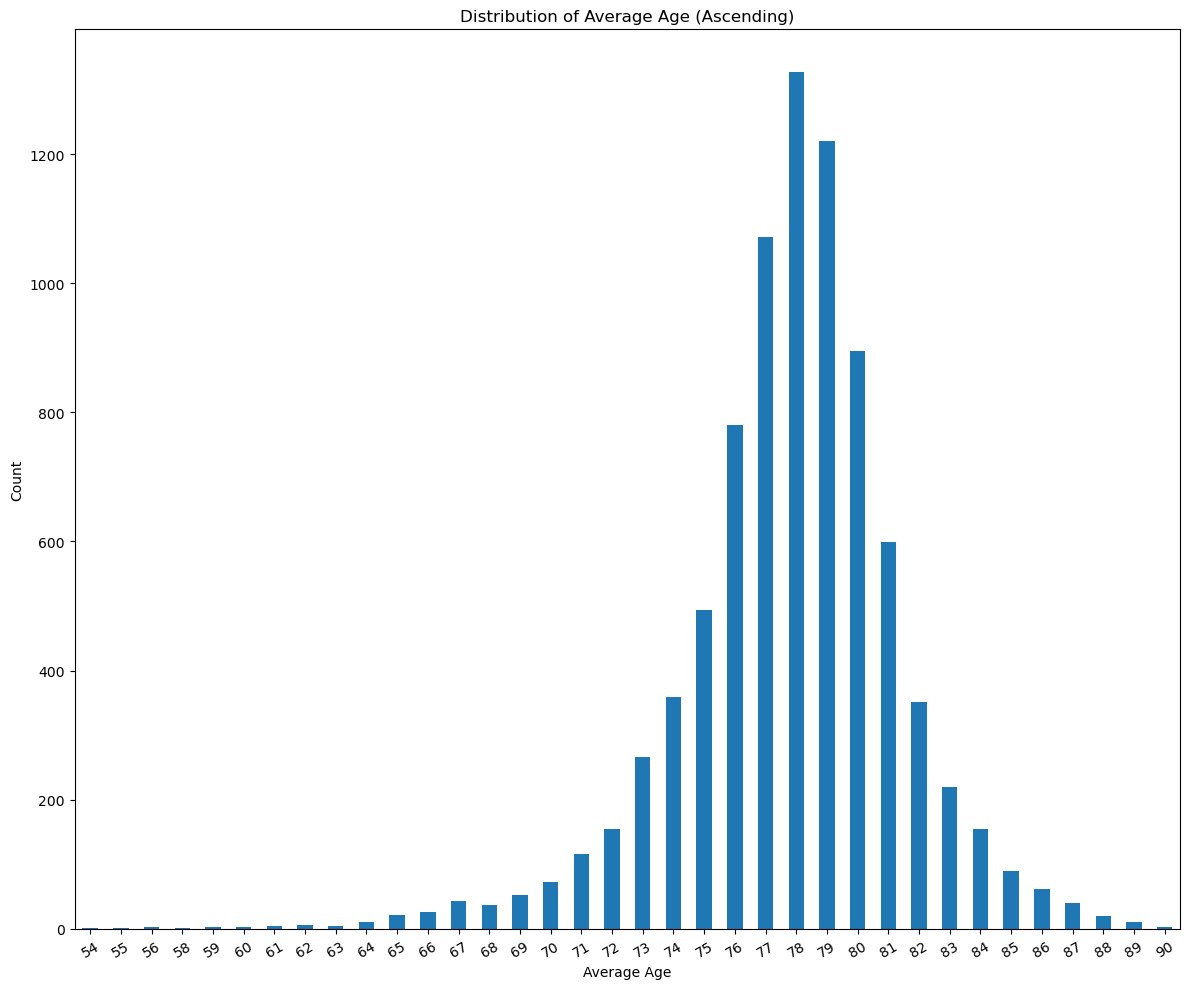

In [19]:
#What is the average age of a beneficiary receiving home health with medicare as the primary payer? 
plt.figure(figsize=(12,10))
plt.subplots_adjust(bottom=0.8)

# Get counts of each age
ptvisits_state = df['BENE_AVG_AGE'].value_counts()

# Sort by the index (age values) in ascending order
ptvisits_state = ptvisits_state.sort_index(ascending=True)

ptvisits_state.plot(kind='bar')
plt.title('Distribution of Average Age (Ascending)')
plt.xlabel('Average Age')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

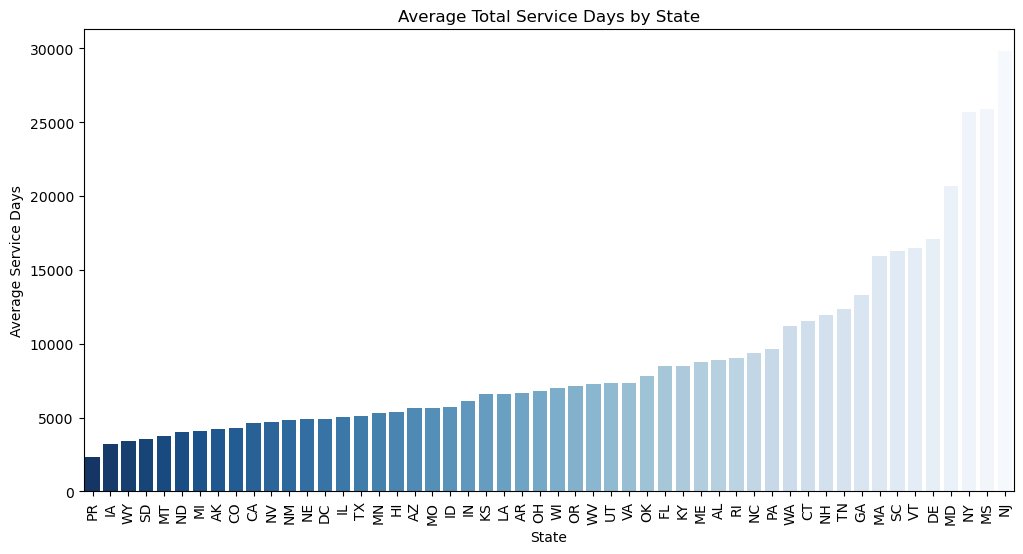

In [20]:
#Which states have the highest average among its beneficiaries for service days? 
group_test_sorted = group_test.sort_values("average_value", ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(data=group_test_sorted, x="STATE", y="average_value", palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Average Total Service Days by State")
plt.xlabel("State")
plt.ylabel("Average Service Days")
plt.show()

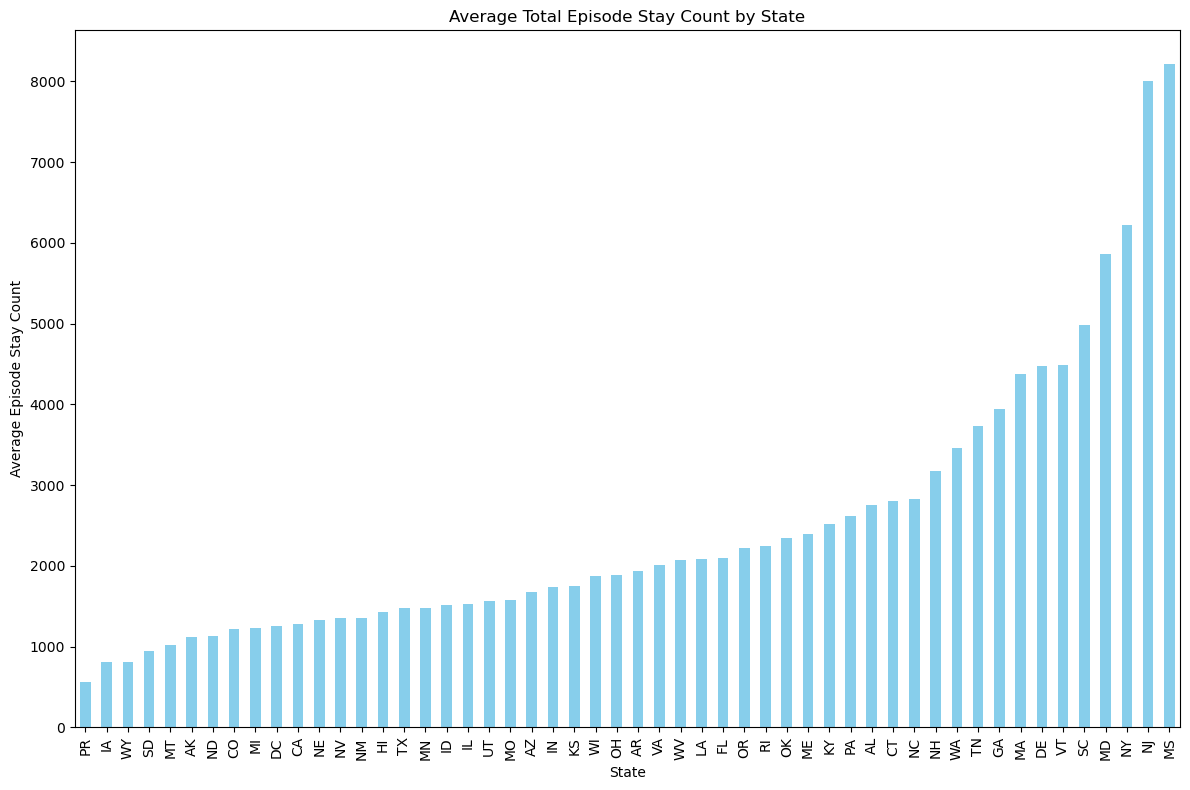

In [21]:
#Which states have the highest average among its beneficiaries for total episodes? 

avg_stay_by_state = df.groupby("STATE")['TOT_EPSD_STAY_CNT'].mean().sort_values(ascending=True)

plt.figure(figsize=(12,8))
avg_stay_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Total Episode Stay Count by State")
plt.xlabel("State")
plt.ylabel("Average Episode Stay Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

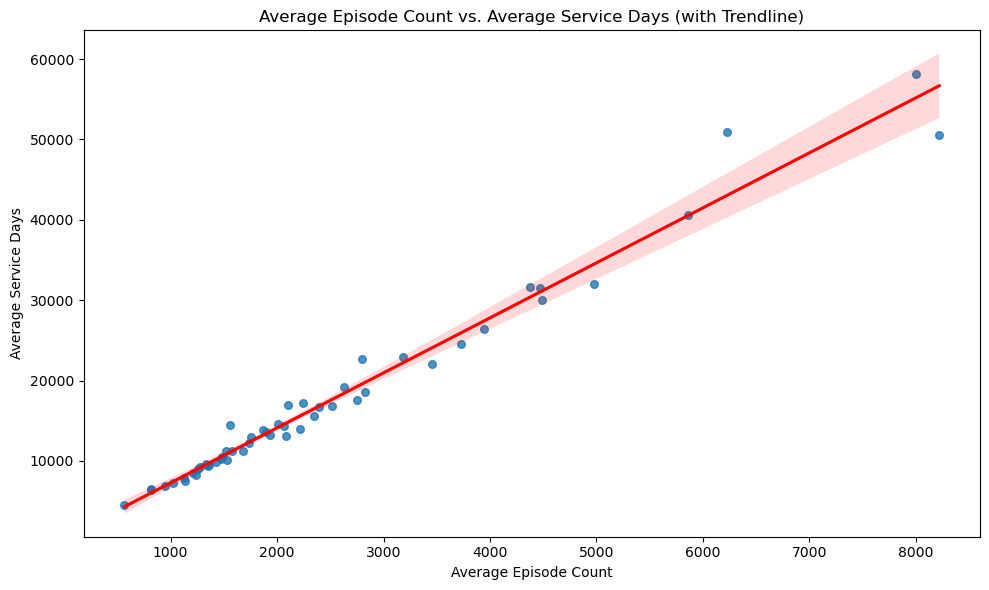

In [22]:
#Is there a relationship between episode counts and service days? 
#Group by state and calculate both averages
state_avg = df.groupby("STATE").agg({
    "TOT_EPSD_STAY_CNT": "mean",
    "TOT_SRVC_DAYS": "mean"
}).reset_index()

plt.figure(figsize=(10,6))
sns.regplot(
    data=state_avg,
    x="TOT_EPSD_STAY_CNT",
    y="TOT_SRVC_DAYS",
    scatter_kws={'s':30},  # marker size
    line_kws={'color':'red'}  # trendline
)
plt.title("Average Episode Count vs. Average Service Days (with Trendline)")
plt.xlabel("Average Episode Count")
plt.ylabel("Average Service Days")
plt.tight_layout()
plt.show()

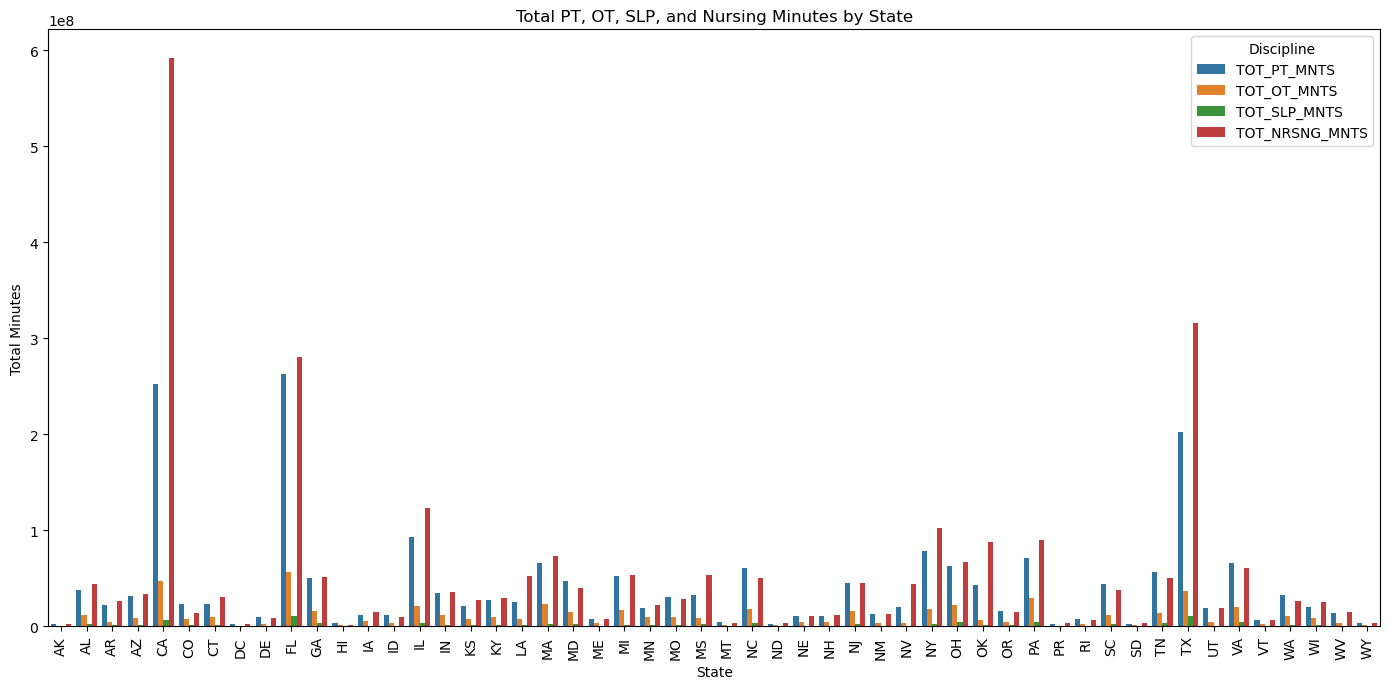

In [23]:
#Which states have the highest utilization of nursing and therapy services tracked by minutes? 
for col in ["TOT_PT_MNTS", "TOT_OT_MNTS", "TOT_SLP_MNTS", "TOT_NRSNG_MNTS"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

minutes_by_state = df.groupby("STATE")[["TOT_PT_MNTS", "TOT_OT_MNTS", "TOT_SLP_MNTS", "TOT_NRSNG_MNTS"]].sum().reset_index()

minutes_long = minutes_by_state.melt(
    id_vars="STATE",
    value_vars=["TOT_PT_MNTS", "TOT_OT_MNTS", "TOT_SLP_MNTS", "TOT_NRSNG_MNTS"],
    var_name="Discipline",
    value_name="Total_Minutes"
)

plt.figure(figsize=(14,7))
sns.barplot(
    data=minutes_long,
    x="STATE",
    y="Total_Minutes",
    hue="Discipline"
)

plt.title("Total PT, OT, SLP, and Nursing Minutes by State")
plt.xlabel("State")
plt.ylabel("Total Minutes")
plt.xticks(rotation=90)
plt.legend(title="Discipline")
plt.tight_layout()
plt.show()

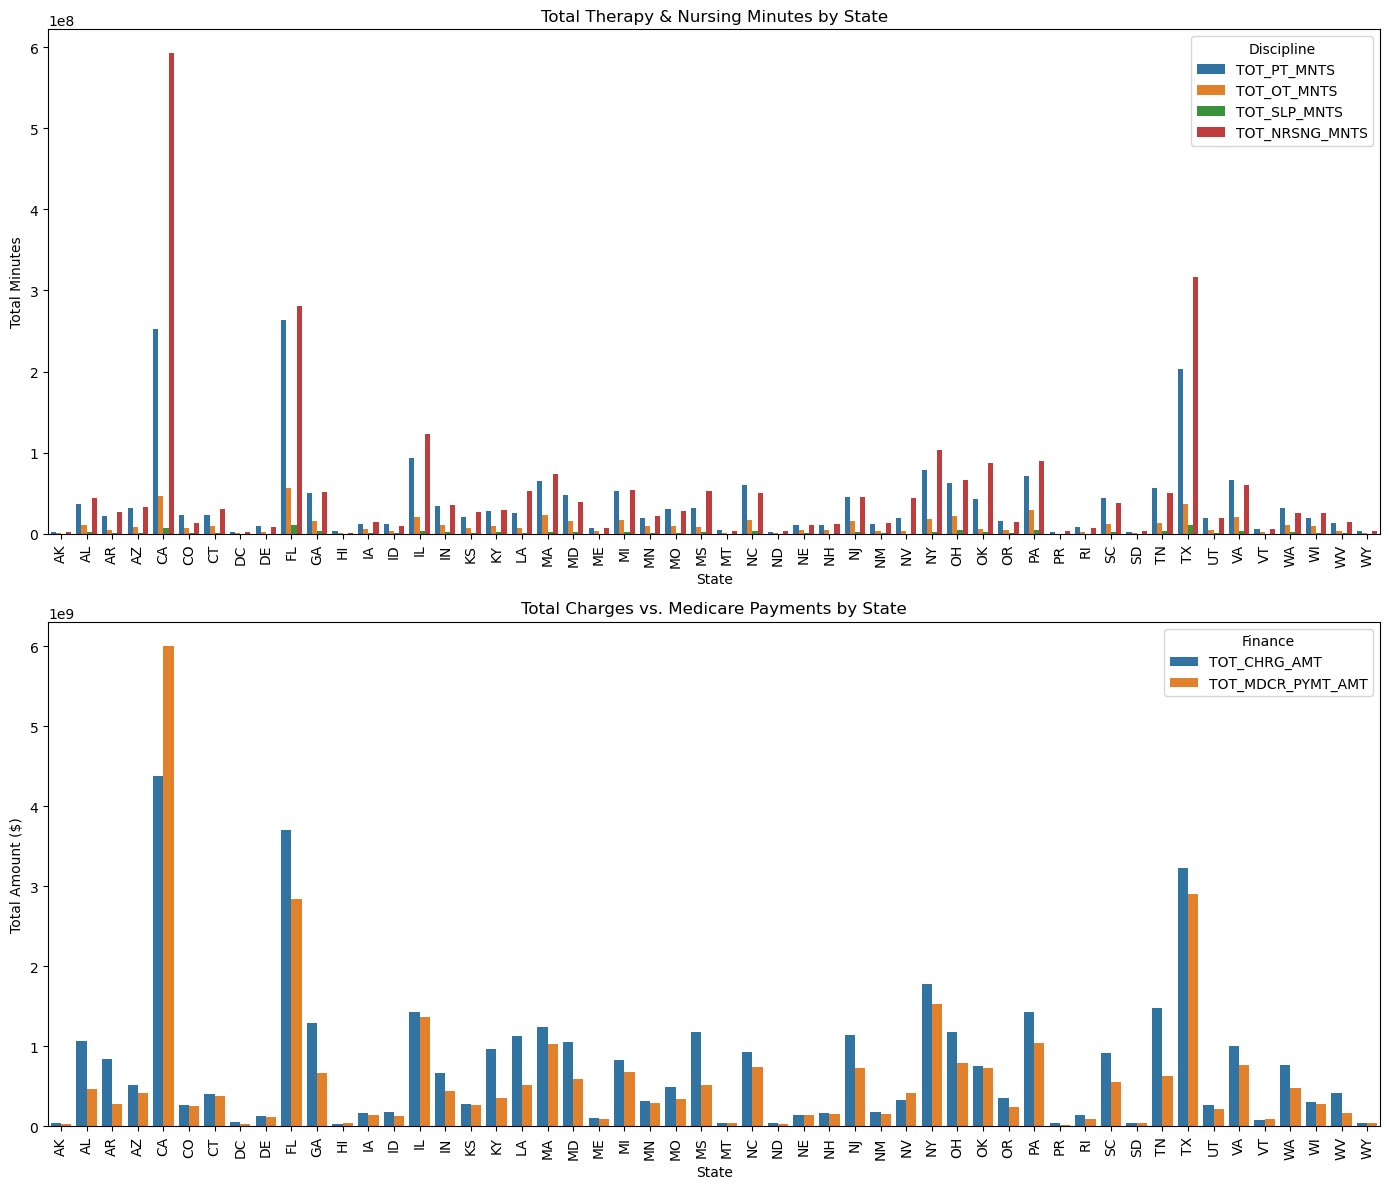

In [24]:
for col in ["TOT_CHRG_AMT", "TOT_MDCR_PYMT_AMT"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

state_summary = df.groupby("STATE")[[
    "TOT_PT_MNTS", "TOT_OT_MNTS", "TOT_SLP_MNTS", "TOT_NRSNG_MNTS",
    "TOT_CHRG_AMT", "TOT_MDCR_PYMT_AMT"
]].sum().reset_index()
# First reshape minutes (PT/OT/SLP/Nursing)
minutes_long = state_summary.melt(
    id_vars="STATE",
    value_vars=["TOT_PT_MNTS", "TOT_OT_MNTS", "TOT_SLP_MNTS", "TOT_NRSNG_MNTS"],
    var_name="Discipline",
    value_name="Total_Minutes"
)

# Then reshape charges/payments
money_long = state_summary.melt(
    id_vars="STATE",
    value_vars=["TOT_CHRG_AMT", "TOT_MDCR_PYMT_AMT"],
    var_name="Finance",
    value_name="Amount"
)

fig, axes = plt.subplots(2, 1, figsize=(14,12))

# Top chart = minutes
sns.barplot(data=minutes_long, x="STATE", y="Total_Minutes", hue="Discipline", ax=axes[0])
axes[0].set_title("Total Therapy & Nursing Minutes by State")
axes[0].set_xlabel("State")
axes[0].set_ylabel("Total Minutes")
axes[0].tick_params(axis="x", rotation=90)

# Bottom chart = charges vs Medicare payments
sns.barplot(data=money_long, x="STATE", y="Amount", hue="Finance", ax=axes[1])
axes[1].set_title("Total Charges vs. Medicare Payments by State")
axes[1].set_xlabel("State")
axes[1].set_ylabel("Total Amount ($)")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()